# Analyzing Covid19 Data using Linear Regression


In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline
 
# import seaborn as seabornInstance
from sklearn import metrics


In [2]:
#Get live Data from https://data.humdata.org/
confirmed_cases = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")
recovered_cases = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv")
total_deaths = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")


In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [4]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,32,32,40,43,54,99,112,131
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,182,197,217,232,248,251,277,283,302,314
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,405,460,591,601,691,708,783,846,894,1047
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,71,71,128,128,128,169,169,191,205,235
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,4,4,4,5,5,5,5,6,6


In [5]:
total_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,18,18,21,23,25,30,30,30,33
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,24,25,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,256,275,293,313,326,336,348,364,367,375
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,26,26,29,29,31,33,33,35,35,36
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
def get_daily_sum(dates, data):
    """
    Input 1: Dates => List of dates
    input 2: Data => Dictionary: Key = date, value = list of all data on that date
    return: list of sum of all data for each date
    """
    return np.array([sum(data[date]) for date in dates])

In [7]:
dates = confirmed_cases.keys()[4:]
numbered_dates = np.array(range(len(dates)))
daily_total_cases = get_daily_sum(dates, confirmed_cases)
daily_total_recovered = get_daily_sum(dates, recovered_cases)
daily_total_deaths = get_daily_sum(dates, total_deaths)

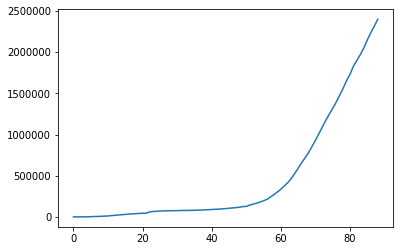

In [8]:
# Plot Graph showing confirmed cases
plt.plot(numbered_dates, daily_total_cases)

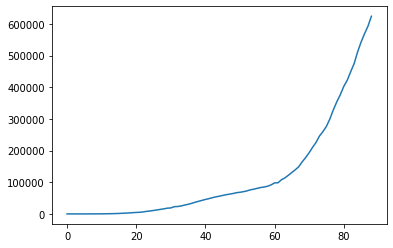

In [9]:
# Plot Graph showing recovered cases
plt.plot(numbered_dates, daily_total_recovered)

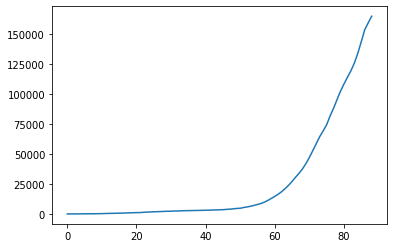

In [10]:
# Plot Graph showing total Deaths
plt.plot(numbered_dates, daily_total_deaths)

## Using Linear Regression to for predicting growth 

In [11]:
X = numbered_dates.reshape(-1, 1)
y = daily_total_cases.reshape(-1, 1)

In [12]:
# Split 80% of data to be training set
# and 20% to be testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-489681.90506421]
[[21939.82948497]]


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,941,-4.458022e+05
1,23892,-2.044641e+05
2,167454,6.731291e+05
3,92840,4.098511e+05
4,660693,9.583468e+05
5,76819,1.685130e+05
6,105847,4.976104e+05
7,97886,4.537308e+05
8,1565278,1.221625e+06
9,2401378,1.441023e+06


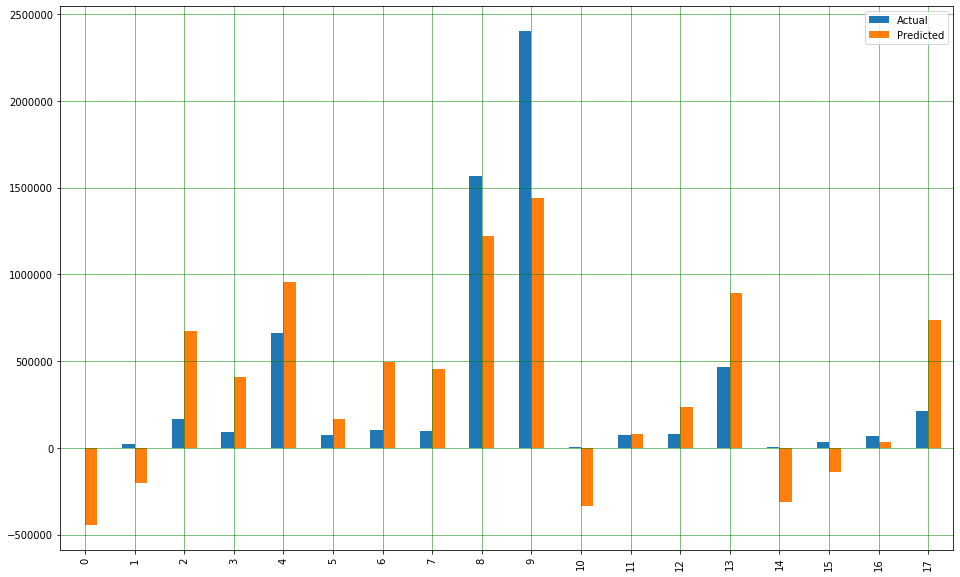

In [17]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

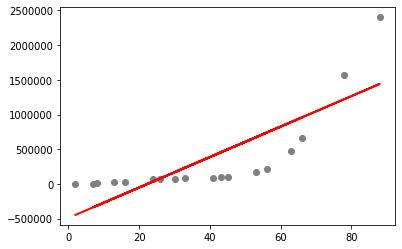

In [18]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 328882.03758700297
Mean Squared Error: 153151103561.20288
Root Mean Squared Error: 391345.2485481367


### Linear Regression is not the right ML Algorithm for analyzing this data